In [2]:
import sys
import SimpleITK as sitk
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from glob import glob
from PIL import Image
import csv
from random import randint
from sklearn.model_selection import StratifiedShuffleSplit
import random
import numpy as np
from load_tools import load_itk, show_images, world_2_voxel

%matplotlib inline

# Plot sample images from LUNA candidates list

In [3]:
all_candidates = pd.read_csv('/datagrid/Medical/nodules/Luna/candidates.csv')
nonnodules = all_candidates[all_candidates['class']==0]  
nodules = all_candidates[all_candidates['class'] == 1]
joined_nodules = nonnodules.append(nodules)
'(nodules: {} non-nodules: {}) / {}'.format(nodules.shape[0],nonnodules.shape[0],all_candidates.shape[0])

'(nodules: 1351 non-nodules: 549714) / 551065'

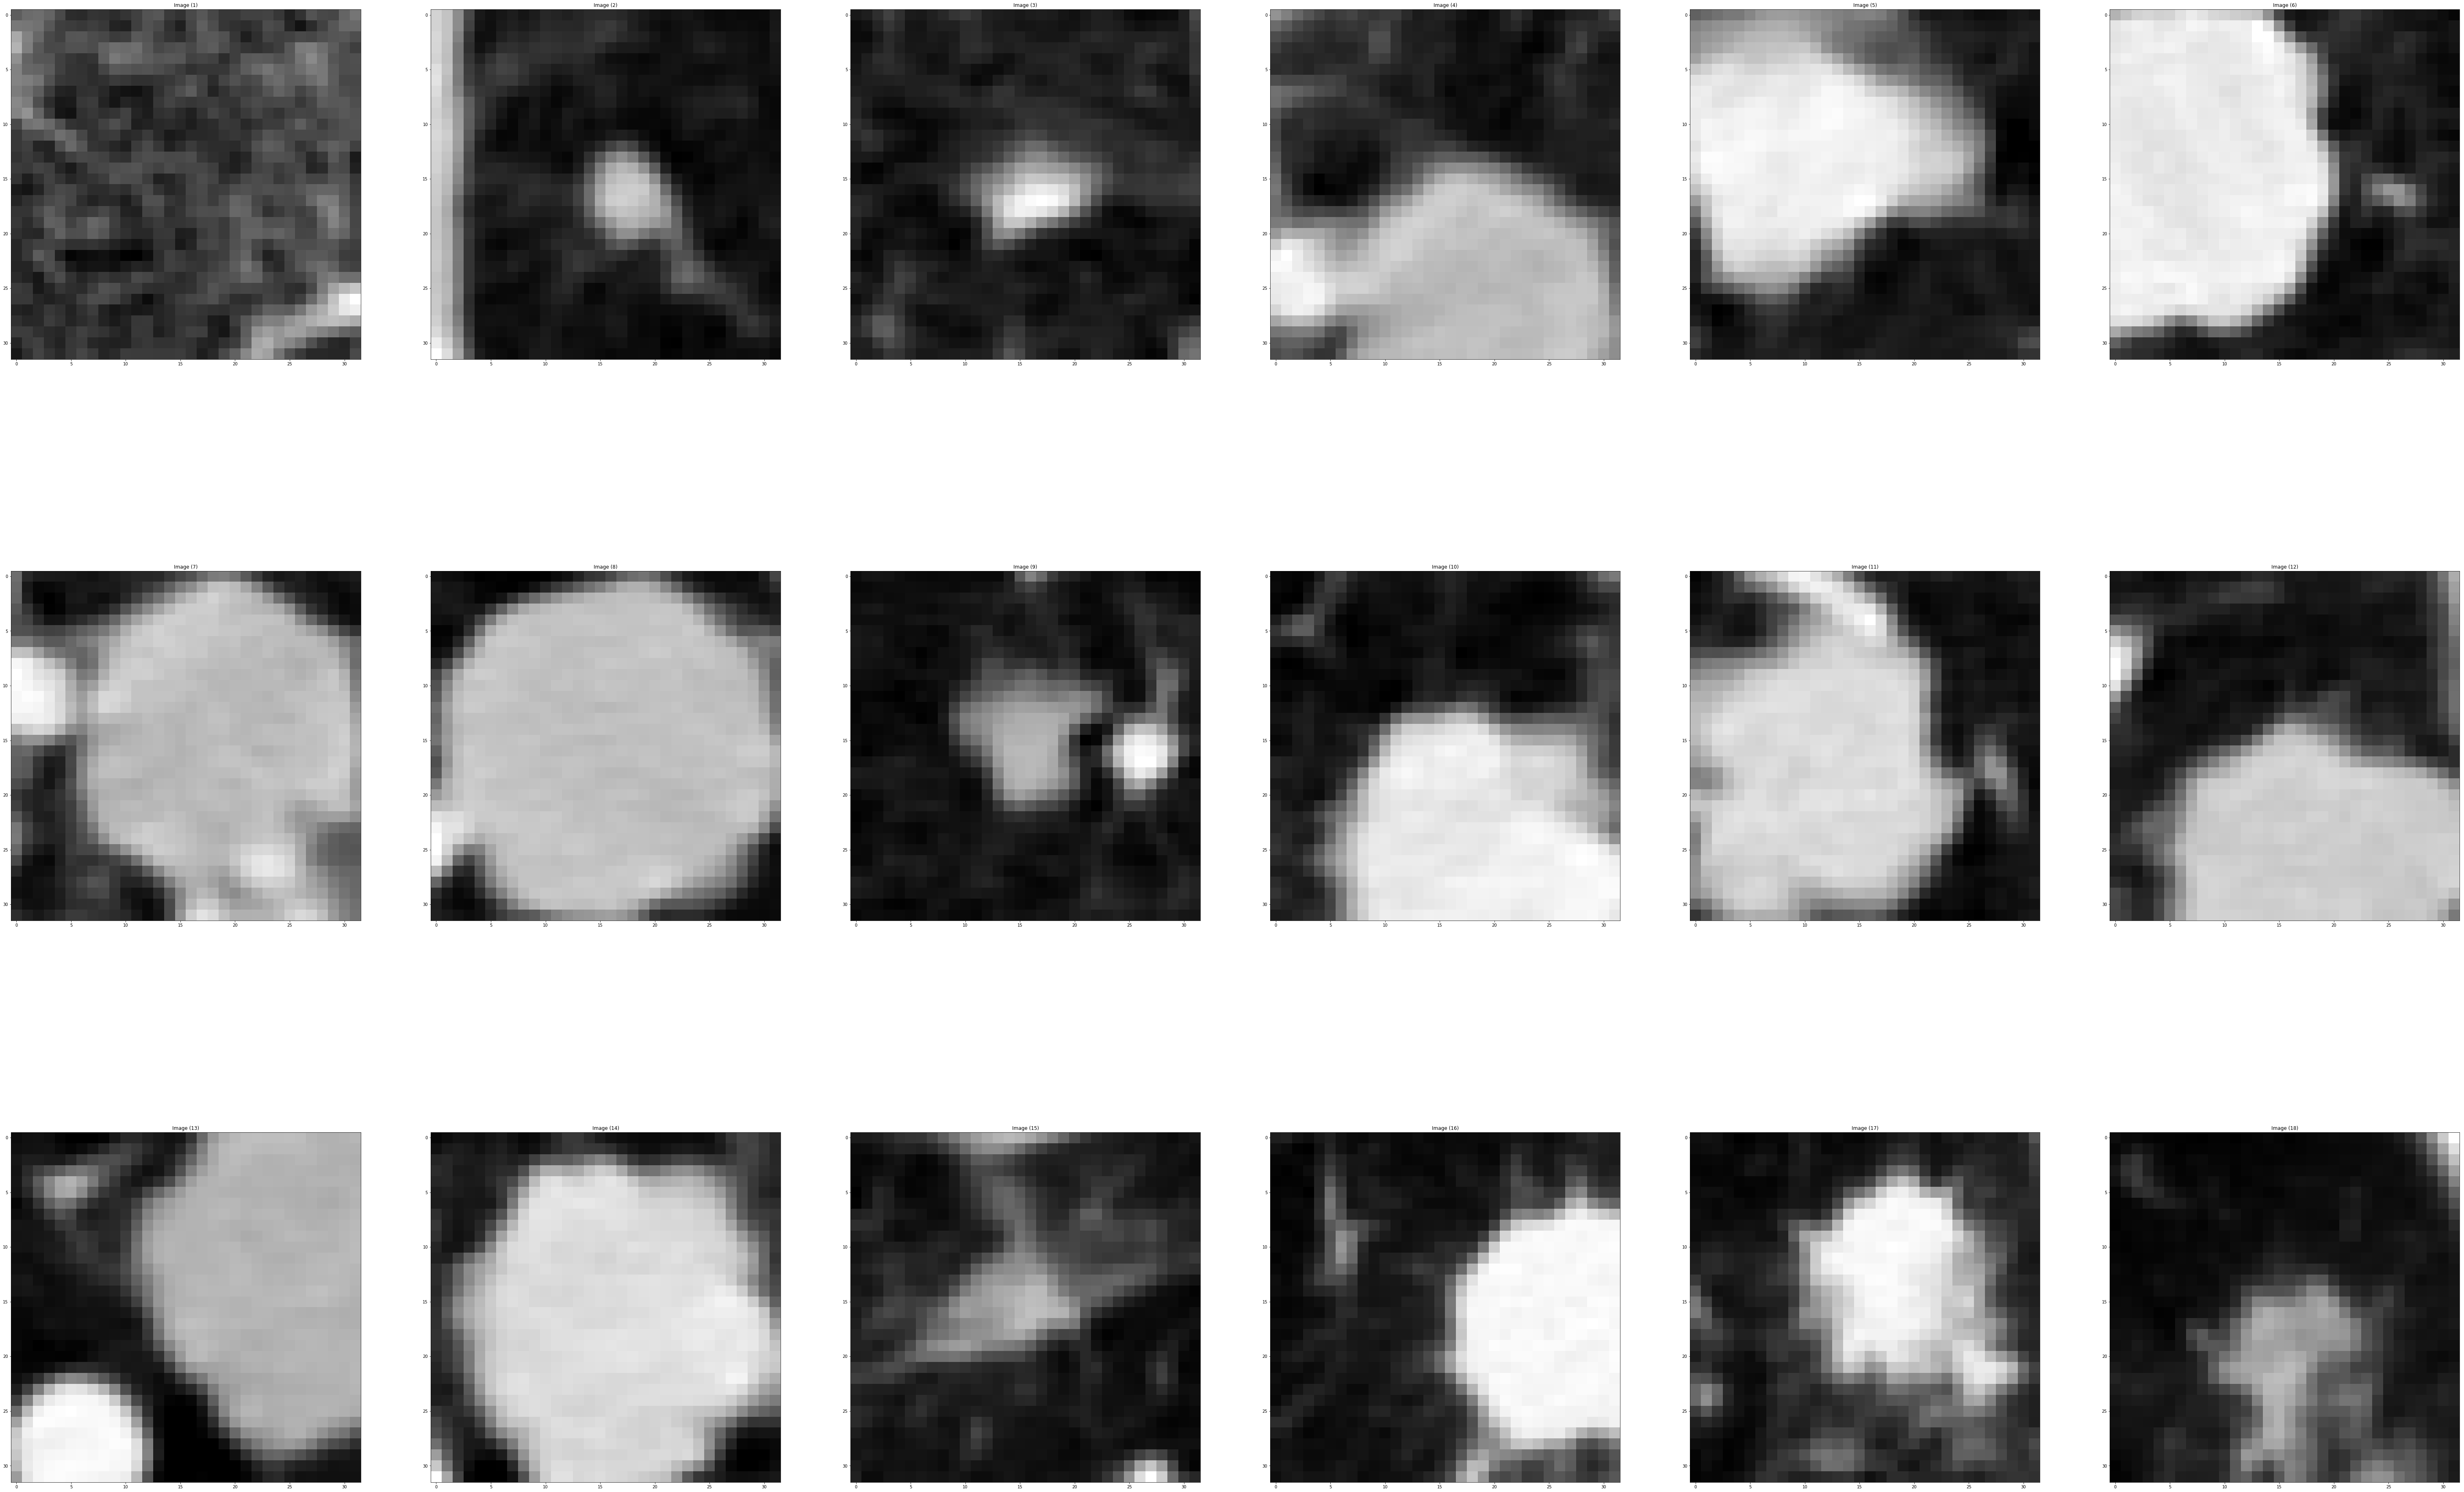

In [6]:
num_images_show = 18

width_size = 32
l = []
patches = []
for i in range(num_images_show):
    im = nodules.iloc[i]
    for subset in range(10):
        input_path = "/datagrid/Medical/nodules/Luna/subset{}".format(subset)
        im_path = join(input_path, im['seriesuid']+'.mhd')
        if isfile(im_path): 
            lung_img = sitk.GetArrayFromImage(sitk.ReadImage(im_path))
            _, orig, spac = load_itk(im_path)
            vox_coords = world_2_voxel([float(im['coordZ']), float(im['coordY']), float(im['coordX'])], orig, spac)
            y_class = int(im['class'])
            w = width_size / 2
            patch = lung_img[int(vox_coords[0]-1): int(vox_coords[0]+2),
                    int(vox_coords[1] - w): int(vox_coords[1] + w),
                    int(vox_coords[2] - w): int(vox_coords[2] + w)]
            l.append(patch[0])
            patches.append(patch)
show_images(l, 3)

# Visualize saved to .npy images

In [7]:
cands = pd.read_csv('/datagrid/temporary/dobkomar/all_candidates.csv')
nodules = cands[cands['class']==1][:10]
nonnodules = cands[cands['class']==0][:10]
print((nodules.shape, nonnodules.shape))

((10, 7), (10, 7))


In [12]:
im_nodules, im_nonnodules = [], []
im_nodules_center, im_nonnodules_center = [], []

for row in tqdm(nodules.iterrows()):
    try:
        lung_image = np.load('/datagrid/temporary/dobkomar/luna/subset{}/'.format(row[1]['subset']) + str(row[1]['seriesuid'])+'_'+str(row[1]['counter'])+'_'+str(row[1]['class'])+'.npy')
        middle = lung_image[16, :, :]
        im_nodules.append(lung_image), im_nodules_center.append(middle)
    except:
        pass

for row in tqdm(nonnodules.iterrows()):
    try:
        lung_image = np.load('/datagrid/temporary/dobkomar/luna/subset{}/'.format(row[1]['subset']) + str(row[1]['seriesuid'])+'_'+str(row[1]['counter'])+'_'+str(row[1]['class'])+'.npy')
        middle = lung_image[16, :, :]
        im_nonnodules.append(lung_image), im_nonnodules_center.append(middle)
    except:
        pass

10it [00:00, 728.68it/s]
10it [00:00, 853.85it/s]


In [13]:
im_nodules[0][:, 0, 0]

array([-916, -907, -927, -961, -906, -900, -939, -920, -902, -939, -953,
       -939, -930, -968, -952, -860, -851, -906, -929, -905, -922, -533,
       -842, -956, -929, -905, -784, -906, -949, -897, -937, -896],
      dtype=int16)

### show only center slices of nodules regions 

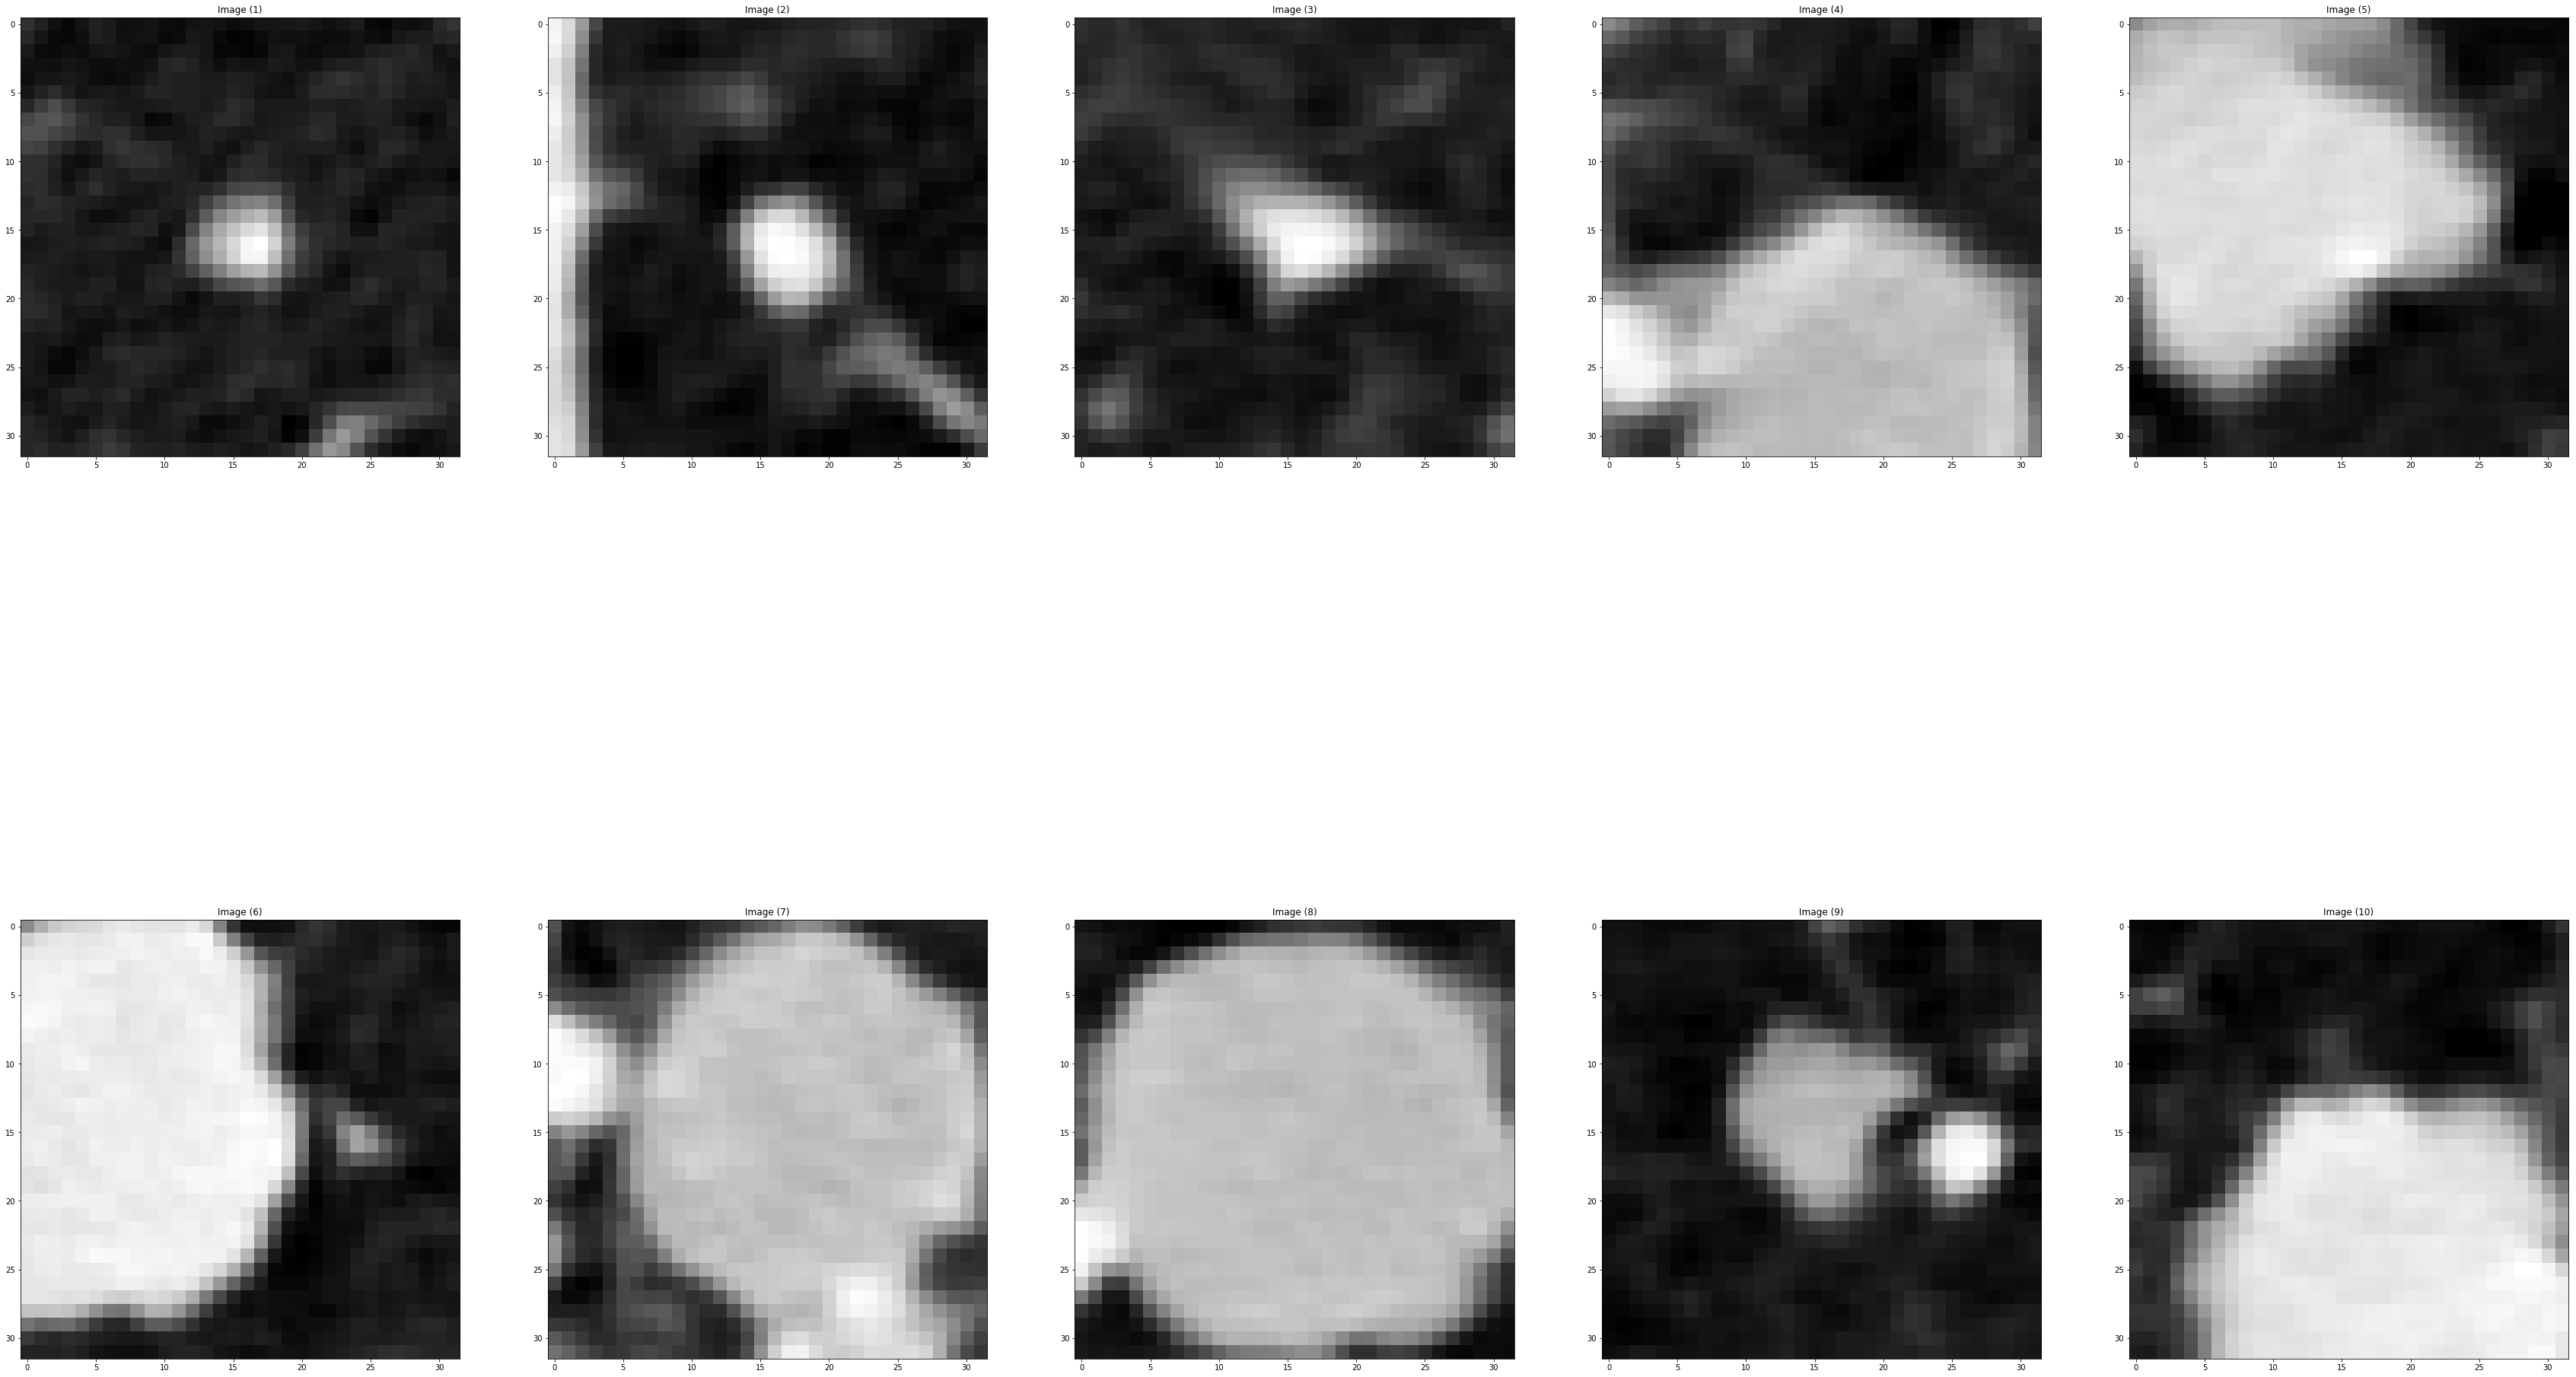

In [14]:
show_images(im_nodules_center, 2)

### show only center slices of nonnodules regions 

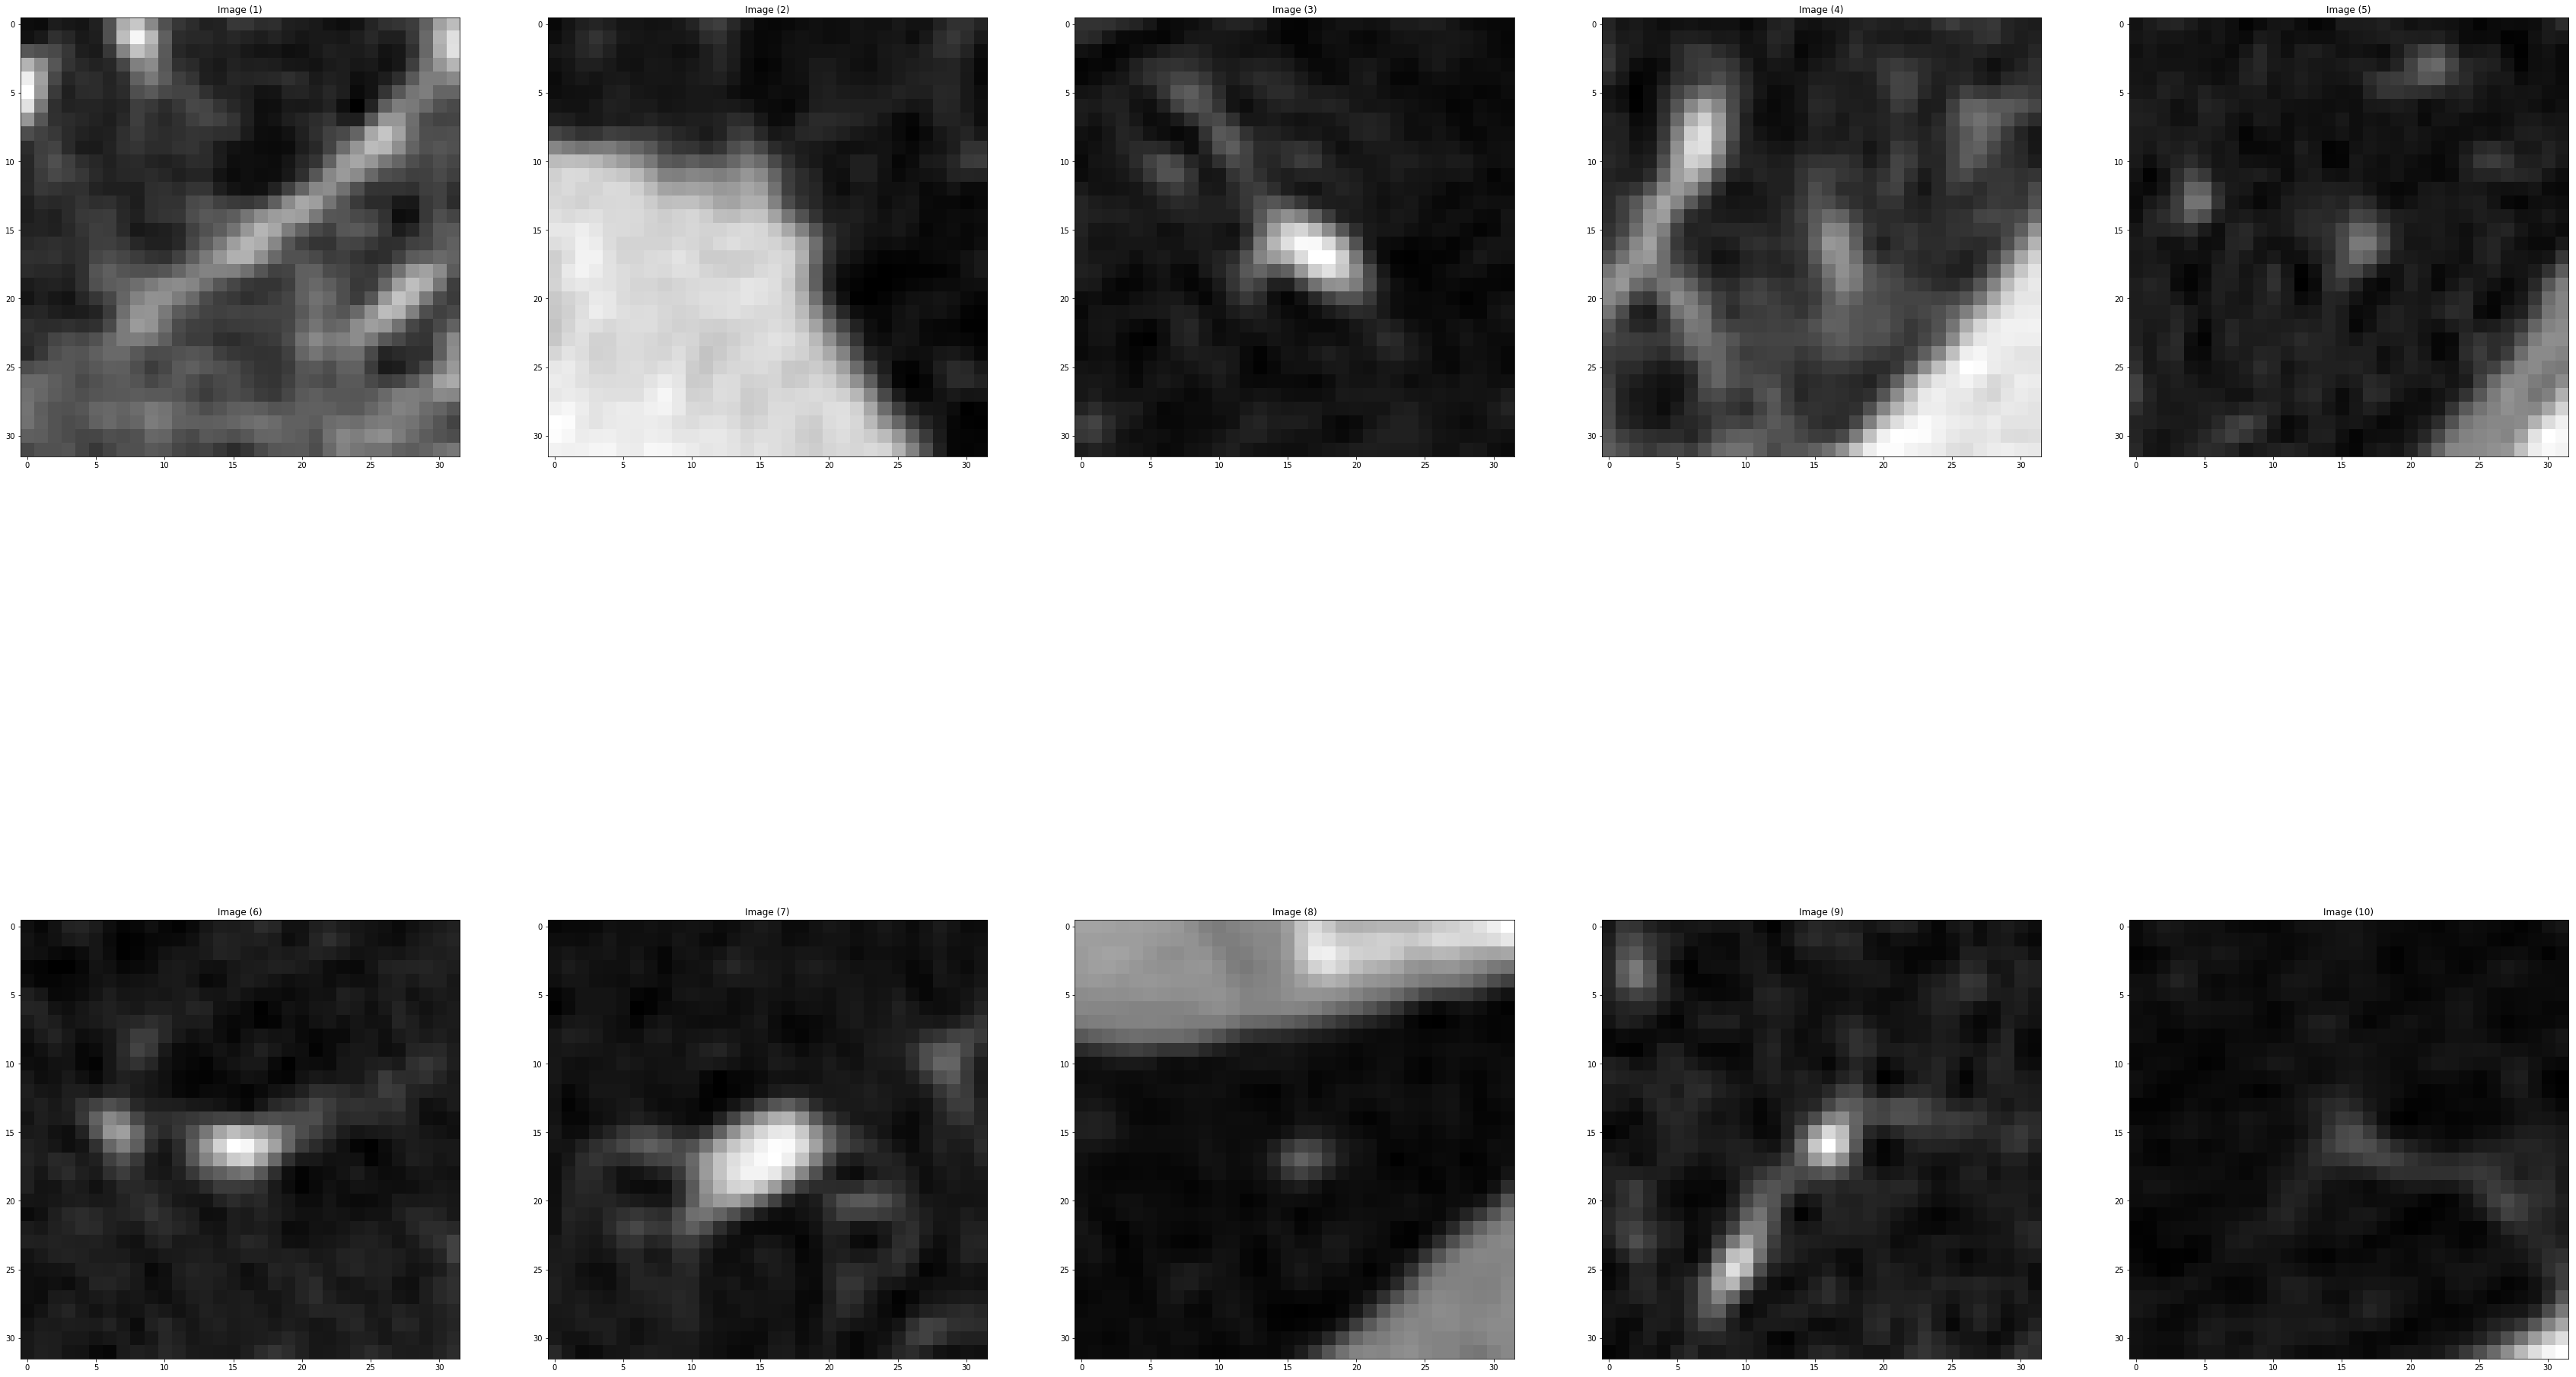

In [15]:
show_images(im_nonnodules_center, 2)

### show all slices for one sample from the nodules  

In [17]:
show_images(im_nodules[6], 4)

### show all slices for one sample from the nonnodules  

In [18]:
show_images(im_nonnodules[4], 4)